In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns=None

C:\Users\Gadikota Enavamshi\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [6]:
hs_train=pd.read_csv('train.csv')
hs_test=pd.read_csv('test.csv')
# hs1=pd.read_csv('train.csv')

In [7]:
hs_train['data']='train'
hs_test['data']='test'
hs_test['SalePrice']=np.nan

In [8]:
hs_test=hs_test[hs_train.columns]

In [9]:
print(hs_train.shape)
print(hs_test.shape)

(1460, 82)
(1459, 82)


In [10]:
hs_test.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
KitchenAbvGr        0
KitchenQual         1
TotRmsAbvGrd        0
Functional          2
Fireplaces          0
FireplaceQu       730
GarageType         76
GarageYrBlt        78
GarageFinish       78
GarageCars          1
GarageArea          1
GarageQual         78
GarageCond         78
PavedDrive          0
WoodDeckSF

In [11]:
hs=pd.concat([hs_train,hs_test])

In [12]:
hs.shape

(2919, 82)

In [13]:
hs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 82 columns):
Id               2919 non-null int64
MSSubClass       2919 non-null int64
MSZoning         2915 non-null object
LotFrontage      2433 non-null float64
LotArea          2919 non-null int64
Street           2919 non-null object
Alley            198 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
Utilities        2917 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2918 non-

### Feature Engineering 
Null Value Treatment

In [14]:
hs.isnull().sum()[hs.isnull().sum()>0]

MSZoning           4
LotFrontage      486
Alley           2721
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        24
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageCars         1
GarageArea         1
GarageQual       159
GarageCond       159
PoolQC          2909
Fence           2348
MiscFeature     2814
SaleType           1
SalePrice       1459
dtype: int64

In [15]:
hs['MiscFeature'].fillna('None',inplace=True)

In [16]:
# Alley rating gravel being 1 paved being 2
hs['Alley'].replace('Grvl',1,inplace=True)
hs['Alley'].replace('Pave',2,inplace=True)
hs['Alley'].fillna(0,inplace=True)

In [17]:
# Street rating gravel being 1 paved being 2
hs['Street'].replace('Grvl',1,inplace=True)
hs['Street'].replace('Pave',2,inplace=True)
hs['Street'].fillna(0,inplace=True)

In [18]:
#  Assigning rating to the quality
hs['PoolQC'].replace('Ex',5,inplace=True)
hs['PoolQC'].replace('Gd',4,inplace=True)
hs['PoolQC'].replace('TA',3,inplace=True)
hs['PoolQC'].replace('Fa',2,inplace=True)
hs['PoolQC'].fillna(0,inplace=True)

In [19]:
# sns.pairplot(hs1)

In [20]:
# hs[['GarageType'
# ,'GarageYrBlt'
# ,'GarageFinish'
# ,'GarageCars'
# ,'GarageArea'
# ,'GarageQual'
# ,'GarageCond']]

In [21]:
#  Assigning rating to the Garagge Type
hs['GarageType'].replace('2Types',5,inplace=True)
hs['GarageType'].replace('Detchd',4,inplace=True)
hs['GarageType'].replace('Attchd',3,inplace=True)
hs['GarageType'].replace('Basment',2,inplace=True)
hs['GarageType'].replace('BuiltIn',1,inplace=True)
hs['GarageType'].replace('CarPort',1,inplace=True)
hs['GarageType'].fillna(0,inplace=True)

In [22]:
# 'GarageFinish'
hs['GarageFinish'].replace('Fin',3,inplace=True)
hs['GarageFinish'].replace('RFn',2,inplace=True)
hs['GarageFinish'].replace('Unf',1,inplace=True)
hs['GarageFinish'].fillna(0,inplace=True)

In [23]:
# Imputing the rated year with mean rating
# import scipy.stats as stats
# stats.mode(hs['GarageYrBlt'])
hs['GarageYrBlt'].fillna(hs['GarageYrBlt'].mean(),inplace=True)

In [24]:
# Rating based on year built, latest being 5 and oldest being 0
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler(feature_range=(0, 5), copy=True)
hs['GarageYrBlt']=mms.fit_transform(hs[['GarageYrBlt']])

In [25]:
# Rating based on GarageArea, highest being 5 and least being 0
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler(feature_range=(0, 5), copy=True)
hs['GarageArea']=mms.fit_transform(hs[['GarageArea']])

In [26]:
# Rating based on GarageQuality best being 5 least being 0
hs['GarageQual'].replace('Ex',5,inplace=True)
hs['GarageQual'].replace('Gd',4,inplace=True)
hs['GarageQual'].replace('TA',3,inplace=True)
hs['GarageQual'].replace('Fa',2,inplace=True)
hs['GarageQual'].replace('Po',1,inplace=True)
hs['GarageQual'].fillna(0,inplace=True)

In [27]:
# Rating based on GarageCondition best being 5 least being 0
hs['GarageCond'].replace('Ex',5,inplace=True)
hs['GarageCond'].replace('Gd',4,inplace=True)
hs['GarageCond'].replace('TA',3,inplace=True)
hs['GarageCond'].replace('Fa',2,inplace=True)
hs['GarageCond'].replace('Po',1,inplace=True)
hs['GarageCond'].fillna(0,inplace=True)

In [28]:
# FireplaceQu
# Rating based on FireplaceQu best being 5 least being 0
hs['FireplaceQu'].replace('Ex',5,inplace=True)
hs['FireplaceQu'].replace('Gd',4,inplace=True)
hs['FireplaceQu'].replace('TA',3,inplace=True)
hs['FireplaceQu'].replace('Fa',2,inplace=True)
hs['FireplaceQu'].replace('Po',1,inplace=True)
hs['FireplaceQu'].fillna(0,inplace=True)

In [29]:
hs[['MiscFeature','MiscVal']]
# Since MiscFeature and MiscVal provides the information about the same feature we tend to drop MiscFeature.
hs=hs.drop(['MiscFeature'],axis=1)

In [30]:
# Fence
hs['Fence'].replace('GdPrv',4,inplace=True)
hs['Fence'].replace('MnPrv',3,inplace=True)
hs['Fence'].replace('GdWo',2,inplace=True)
hs['Fence'].replace('MnWw',1,inplace=True)

hs['Fence'].fillna(0,inplace=True)

In [31]:
# LotFrontage is the place left after the flooring is done. 
#  Here we assume that houses doesnt have lot area left
hs['LotFrontage'].fillna(0,inplace=True)

In [32]:
hs[hs['MasVnrType'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,data
234,235,60,RL,0.0,7851,2,0.0,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,625.0,Unf,0.0,235.0,860.0,GasA,Ex,Y,SBrkr,860,1100,0,1960,1.0,0.0,2,1,4,1,Gd,8,Typ,2,3.0,1.0,1.714744,3.0,2.0,1.478495,3.0,3.0,Y,288,48,0,0,0,0,0.0,0.0,0,5,2010,WD,Normal,216500.0,train
529,530,20,RL,0.0,32668,2,0.0,IR1,Lvl,AllPub,CulDSac,Gtl,Crawfor,Norm,Norm,1Fam,1Story,6,3,1957,1975,Hip,CompShg,Wd Sdng,Stone,NaN,NaN,Gd,TA,PConc,TA,TA,No,Rec,1219.0,Unf,0.0,816.0,2035.0,GasA,TA,Y,SBrkr,2515,0,0,2515,1.0,0.0,3,0,4,2,TA,9,Maj1,2,3.0,3.0,1.282051,2.0,2.0,1.626344,3.0,3.0,Y,0,0,200,0,0,0,0.0,0.0,0,3,2007,WD,Alloca,200624.0,train
650,651,60,FV,65.0,8125,2,0.0,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,7,6,2007,2007,Gable,CompShg,CemntBd,CmentBd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,813.0,813.0,GasA,Ex,Y,SBrkr,822,843,0,1665,0.0,0.0,2,1,3,1,Gd,7,Typ,0,0.0,3.0,1.794872,2.0,2.0,1.888441,3.0,3.0,Y,0,0,0,0,0,0,0.0,0.0,0,5,2008,WD,Normal,205950.0,train
936,937,20,RL,67.0,10083,2,0.0,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,833.0,Unf,0.0,343.0,1176.0,GasA,Ex,Y,SBrkr,1200,0,0,1200,1.0,0.0,2,0,2,1,Gd,5,Typ,0,0.0,3.0,1.730769,2.0,2.0,1.864919,3.0,3.0,Y,0,41,0,0,0,0,0.0,0.0,0,8,2009,WD,Normal,184900.0,train
973,974,20,FV,95.0,11639,2,0.0,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2007,2008,Gable,CompShg,CemntBd,CmentBd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,1428.0,1428.0,GasA,Ex,Y,SBrkr,1428,0,0,1428,0.0,0.0,2,0,3,1,Gd,6,Typ,0,0.0,3.0,1.794872,3.0,2.0,1.612903,3.0,3.0,Y,0,120,0,0,0,0,0.0,0.0,0,12,2008,New,Partial,182000.0,train
977,978,120,FV,35.0,4274,2,2.0,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,TwnhsE,1Story,7,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,1106.0,Unf,0.0,135.0,1241.0,GasA,Ex,Y,SBrkr,1241,0,0,1241,1.0,0.0,1,1,1,1,Gd,4,Typ,0,0.0,3.0,1.794872,3.0,2.0,1.911962,3.0,3.0,Y,0,116,0,0,0,0,0.0,0.0,0,11,2007,New,Partial,199900.0,train
1243,1244,20,RL,107.0,13891,2,0.0,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,10,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Ex,TA,PConc,Ex,Gd,Gd,GLQ,1386.0,Unf,0.0,690.0,2076.0,GasA,Ex,Y,SBrkr,2076,0,0,2076,1.0,0.0,2,1,2,1,Ex,7,Typ,1,4.0,3.0,1.778846,3.0,3.0,2.856183,3.0,3.0,Y,216,229,0,0,0,0,0.0,0.0,0,9,2006,New,Partial,465000.0,train
1278,1279,60,RL,75.0,9473,2,0.0,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,8,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,804.0,Unf,0.0,324.0,1128.0,GasA,Ex,Y,SBrkr,1128,903,0,2031,1.0,0.0,2,1,3,1,Gd,7,Typ,1,4.0,3.0,1.714744,2.0,2.0,1.938844,3.0,3.0,Y,0,211,0,0,0,0,0.0,0.0,0,3,2008,WD,Normal,237000.0,train
231,1692,60,RL,0.0,12891,2,0.0,IR1,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,8,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Ex,TA,No,GLQ,651.0,Unf,0.0,219.0,870.0,GasA,Ex,Y,SBrkr,878,1126,0,2004,1.0,0.0,2,1,4,1,Gd,8,Typ,1,4.0,1.0,1.714744,3.0,3.0,2.163978,3.0,3.0,Y,0,48,0,0,0,0,0.0,0.0,0,7,2009,WD,Normal,NaN,test
246,1707,20,F

In [33]:
#imputing the nulls with None which is the mode of  Masonry Veneer Type
hs['MasVnrType'].fillna('None',inplace=True)

In [34]:
# Finding the mean of Masonry Veneer Area with respect to Masonry Veneer Type
hs['MasVnrArea'].groupby(hs['MasVnrType']).mean()

MasVnrType
BrkCmn     195.480000
BrkFace    261.672355
None         0.820425
Stone      239.550201
Name: MasVnrArea, dtype: float64

In [35]:
# Imputing the nulls with the mean of Masonry Veneer Type = None
hs['MasVnrArea'].fillna(1.094907,inplace=True)

In [36]:
hs['BsmtFinType1'].unique()
# BsmtCond        37
# BsmtExposure    38
# BsmtFinType1    37
# BsmtFinType2    38
# Electrical       1

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', nan, 'LwQ'], dtype=object)

In [37]:
# BsmtQual
# Rating based on BsmtQual best being 5 least being 0
hs['BsmtQual'].replace('Ex',5,inplace=True)
hs['BsmtQual'].replace('Gd',4,inplace=True)
hs['BsmtQual'].replace('TA',3,inplace=True)
hs['BsmtQual'].replace('Fa',2,inplace=True)
hs['BsmtQual'].replace('Po',1,inplace=True)
hs['BsmtQual'].fillna(0,inplace=True)

In [38]:
# BsmtCond
# Rating based on BsmtCond best being 5 least being 0
hs['BsmtCond'].replace('Ex',5,inplace=True)
hs['BsmtCond'].replace('Gd',4,inplace=True)
hs['BsmtCond'].replace('TA',3,inplace=True)
hs['BsmtCond'].replace('Fa',2,inplace=True)
hs['BsmtCond'].replace('Po',1,inplace=True)
hs['BsmtCond'].fillna(0,inplace=True)

In [39]:
# BsmtExposure
# Rating based on BsmtExposure best being 4 least being 0
hs['BsmtExposure'].replace('Gd',4,inplace=True)
hs['BsmtExposure'].replace('Av',3,inplace=True)
hs['BsmtExposure'].replace('Mn',2,inplace=True)
hs['BsmtExposure'].replace('No',1,inplace=True)
hs['BsmtExposure'].fillna(0,inplace=True)

In [40]:
# BsmtFinType1
# Rating based on BsmtFinType1 best being 5 least being 0
hs['BsmtFinType1'].replace('GLQ',6,inplace=True)
hs['BsmtFinType1'].replace('ALQ',5,inplace=True)
hs['BsmtFinType1'].replace('BLQ',4,inplace=True)
hs['BsmtFinType1'].replace('Rec',3,inplace=True)
hs['BsmtFinType1'].replace('LwQ',2,inplace=True)
hs['BsmtFinType1'].replace('Unf',1,inplace=True)
hs['BsmtFinType1'].fillna(0,inplace=True)

In [41]:
# BsmtFinType2
# Rating based on BsmtFinType2 best being 5 least being 0
hs['BsmtFinType2'].replace('GLQ',6,inplace=True)
hs['BsmtFinType2'].replace('ALQ',5,inplace=True)
hs['BsmtFinType2'].replace('BLQ',4,inplace=True)
hs['BsmtFinType2'].replace('Rec',3,inplace=True)
hs['BsmtFinType2'].replace('LwQ',2,inplace=True)
hs['BsmtFinType2'].replace('Unf',1,inplace=True)
hs['BsmtFinType2'].fillna(0,inplace=True)

In [42]:
hs[hs['Electrical'].isnull()]
b=hs['Electrical'].mode()
hs['Electrical'].fillna(b[0],inplace=True)

In [43]:
# hs.KitchenQual.unique()
# 'Gd', 'TA', 'Ex', 'Fa'
hs['KitchenQual'].replace('Ex',4,inplace=True)
hs['KitchenQual'].replace('Gd',3,inplace=True)
hs['KitchenQual'].replace('TA',2,inplace=True)
hs['KitchenQual'].replace('Fa',1,inplace=True)
hs['KitchenQual'].fillna(0,inplace=True)

In [44]:
# Creating a new feature Kitchen_index based on KitchenQual and KitchenAbvGr
hs['Kitchen_index']=hs['KitchenQual']*hs['KitchenAbvGr']
# hs['Kitchen_index'].dtype

In [45]:
# Droping the old columns
hs=hs.drop(['KitchenQual','KitchenAbvGr'],axis=1)

In [46]:
# Creating a new feature Kitchen_index based on KitchenQual and KitchenAbvGr
hs['FirePlace_index']=hs['Fireplaces']*hs['FireplaceQu']

In [47]:
# Droping the old columns
hs=hs.drop(['Fireplaces','FireplaceQu'],axis=1)

In [48]:
hs['Garage_index']=hs['GarageType']+hs['GarageYrBlt']+hs['GarageFinish']+hs['GarageCars']+hs['GarageArea']+hs['GarageQual']+hs['GarageCond']
hs['Garage_index'].fillna(0,inplace=True)

In [49]:
hs=hs.drop(['GarageType','GarageYrBlt','GarageFinish','GarageCars','GarageArea', 'GarageQual',
       'GarageCond'],axis=1)

In [50]:
hs['Pool_index']=hs['PoolArea']*hs['PoolQC']

In [51]:
hs=hs.drop(['PoolArea', 'PoolQC'],axis=1)

In [52]:
'ExterQual'
# hs['ExterQual'].unique()
hs['ExterQual'].replace('Ex',4,inplace=True)
hs['ExterQual'].replace('Gd',3,inplace=True)
hs['ExterQual'].replace('TA',2,inplace=True)
hs['ExterQual'].replace('Fa',1,inplace=True)

In [53]:
 'ExterCond'
hs['ExterCond'].unique()
hs['ExterCond'].replace('Ex',5,inplace=True)
hs['ExterCond'].replace('Gd',4,inplace=True)
hs['ExterCond'].replace('TA',3,inplace=True)
hs['ExterCond'].replace('Fa',2,inplace=True)
hs['ExterCond'].replace('Po',1,inplace=True)

In [54]:
'HeatingQC'
hs['HeatingQC'].unique()
hs['HeatingQC'].replace('Ex',5,inplace=True)
hs['HeatingQC'].replace('Gd',4,inplace=True)
hs['HeatingQC'].replace('TA',3,inplace=True)
hs['HeatingQC'].replace('Fa',2,inplace=True)
hs['HeatingQC'].replace('Po',1,inplace=True)

In [55]:
hs['BsmtUnfSF'].isnull().sum()

1

In [56]:
hs['BsmtFinSF2'].fillna(hs['BsmtFinSF2'].mean(), inplace=True)
hs['BsmtFinSF1'].fillna(hs['BsmtFinSF1'].mean(), inplace=True)
hs['BsmtUnfSF'].fillna(hs['BsmtUnfSF'].mean(), inplace=True)
hs['BsmtFullBath'].fillna(hs['BsmtFullBath'].mean(), inplace=True)
hs['BsmtHalfBath'].fillna(hs['BsmtHalfBath'].mean(), inplace=True)
hs['TotalBsmtSF'].fillna(hs['TotalBsmtSF'].mean(), inplace=True)

In [57]:
# Columns fo rmin max scalar in basement
hs['Bsmt_index']=((hs['BsmtFinSF1']-hs['BsmtUnfSF']) * hs['BsmtFinType1'])+((hs['BsmtFinSF2'] -hs['BsmtUnfSF'])* hs['BsmtFinType2'])

In [58]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler(feature_range=(0, 5), copy=True)
hs['Bsmt_index']=mms.fit_transform(hs[['Bsmt_index']])

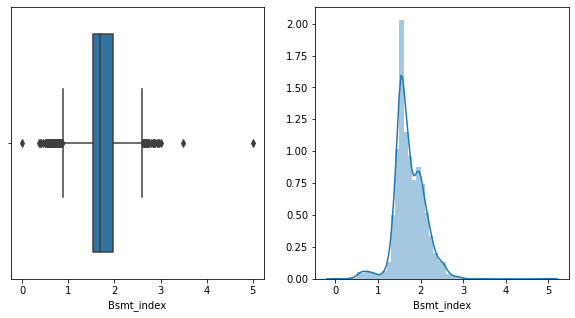

In [59]:
fig, ax=plt.subplots(1,2,figsize=(10,5))
sns.boxplot(hs['Bsmt_index'],ax=ax[0])
sns.distplot(hs['Bsmt_index'],ax=ax[1], norm_hist=True)
plt.show()

##### From the above KDE plot we could see that there are some outliers in the data, we gotta check them...!

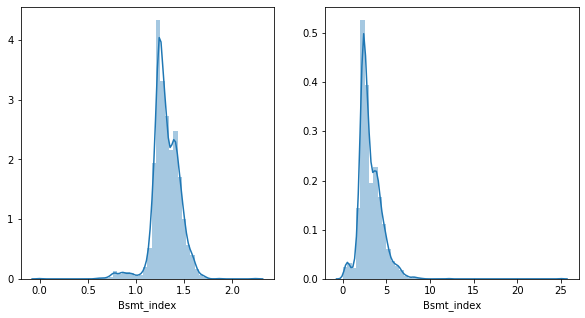

In [60]:
# Checking with the differnt types of transfiormations 
# log results in some infinte values
# square results in increase in the kurtosis which increased the outliers
#  Square root is better comparatively but it dint handle all the outliers
fig, ax=plt.subplots(1,2,figsize=(10,5))
sns.distplot(np.sqrt(hs['Bsmt_index']),ax=ax[0])
sns.distplot((hs['Bsmt_index'])**2,ax=ax[1], norm_hist=True,)
plt.show()

##### Square root is better comparatively but it dint handle all the outliers, so we decide to remove the outliers.

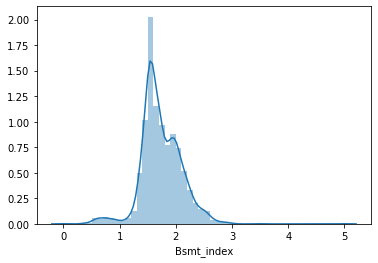

In [61]:
# hs=hs.drop(hs[hs['Bsmt_index']>3].index)
hs['Bsmt_index']=mms.fit_transform(hs[['Bsmt_index']])
sns.distplot(hs['Bsmt_index'])

##### Now we gotta remove the additional columns since we computed basement index

In [62]:
hs=hs.drop(['BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2','BsmtUnfSF'], axis=1)

In [63]:
hs['MSZoning'].fillna(hs['MSZoning'].mode()[0], inplace=True)
hs['MSZoning'].replace('C (all)','C',inplace=True)
hs['Utilities'].fillna(hs['Utilities'].mode()[0], inplace=True)
hs['Exterior1st'].fillna(hs['Exterior1st'].mode()[0], inplace=True)
hs['Exterior2nd'].fillna(hs['Exterior2nd'].mode()[0], inplace=True)
hs['Functional'].fillna(hs['Functional'].mode()[0], inplace=True)
hs['SaleType'].fillna(hs['SaleType'].mode()[0], inplace=True)

In [64]:
hs.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'TotRmsAbvGrd', 'Functional', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'Fence', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice', 'data', 'Kitchen_index',
       'FirePlace_index', 'Garage_index', 'Pool_index', '

In [65]:
hs_train=hs[hs.data=='train']
hs_test=hs[hs.data=='test']

hs_train.drop('data',axis=1,inplace=True)
hs_test.drop('data',axis=1,inplace=True)

hs_test.drop('SalePrice',axis=1,inplace=True)

X=hs_train.select_dtypes(['float64', 'int64'])
X=X.drop('SalePrice',axis=1)
y=hs_train['SalePrice']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.30)

C:\Users\Gadikota Enavamshi\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [66]:
X_test.shape

(438, 42)

In [67]:
from sklearn.linear_model import LinearRegression

In [68]:
lr=LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_train,y_train)
y_predict=lr.predict(X_test)

In [69]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
mse=mean_squared_error(y_test,y_predict)
print('RMSE Value',np.sqrt(mse))
r2=r2_score(y_test,y_predict)
print('R Squared Value',r2)

RMSE Value 30866.17956778163
R Squared Value 0.8514968823095403


In [70]:
hs_test.shape

(1459, 66)

In [71]:
test1=hs_test.select_dtypes(['float64', 'int64'])
y_pred_lr1=lr.predict(test1)
# len(y_pred_lr1)
# test1['Id'].count()
sub1=pd.DataFrame(y_pred_lr1, columns=['SalePrice'])
sub1=pd.concat([test1['Id'],sub1],axis=1)
sub1.to_csv('sub1.csv', index='False')
# test1.isnull().sum()

##### Here ends the base predictions, now on we start building models considering all the factors

In [72]:
catcols=hs.select_dtypes('object').columns[:-1]
catcols

Index(['MSZoning', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'Electrical',
       'Functional', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [73]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
for i in catcols:
    hs[i]=le.fit_transform(hs[i])

In [74]:
hs_train=hs[hs.data=='train']
hs_test=hs[hs.data=='test']

hs_train.drop('data',axis=1,inplace=True)
hs_test.drop('data',axis=1,inplace=True)

hs_test.drop('SalePrice',axis=1,inplace=True)

X=hs_train.drop('SalePrice',axis=1)
y=hs_train['SalePrice']

# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.30,random_state=10)

C:\Users\Gadikota Enavamshi\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [75]:
##### TPOT Regressor

In [76]:
from tpot import TPOTRegressor
tpot = TPOTRegressor(generations=5, population_size=50, verbosity=1)
tpot.fit(X[impcols], y)

NameError: name 'impcols' is not defined

In [ ]:
y_predtpot=tpot.predict(hs_test[impcols])
sub3=pd.DataFrame(y_predtpot, columns=['SalePrice'])
sub3=pd.concat([hs_test['Id'],sub3],axis=1)
sub3.to_csv('sub4.csv', index='False')

##### OLS 

In [ ]:

import statsmodels.regression.linear_model as sm
lm=sm.OLS(y,X).fit()
lm.summary()

In [ ]:
impcols=abs(lm.params[abs(lm.params)>200]).sort_values(ascending=False).index

In [ ]:
lst=[]
lst2=[]
for i in impcols:
    lst.append(i)
    lr.fit(X_train[lst],y_train)
    y_pred=lr.predict(X_test[lst])
    rmse=np.sqrt(mean_squared_error(y_test,y_pred))
    lst2.append(rmse)

In [ ]:
plt.plot(lst2)
# min(lst2)

In [ ]:
lr.fit(X[impcols],y)
Y_pred_lr2=lr.predict(hs_test[impcols])
sub5=pd.DataFrame(y_predrf, columns=['SalePrice'])
sub5=pd.concat([hs_test['Id'],sub5],axis=1)
sub5.to_csv('sub5.csv', index='False')

#### Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(X_train, y_train)

# y_predrf=rf.predict(X_test)
y_predrf=rf.predict(hs_test)
sub2=pd.DataFrame(y_predrf, columns=['SalePrice'])
sub2=pd.concat([hs_test['Id'],sub2],axis=1)
sub2.to_csv('sub2.csv', index='False')

#### XG Boost

In [79]:
import xgboost as xgb

model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

model_xgb.fit(X_train, y_train)
xgb_train_pred = model_xgb.predict(X_train)
xgb_pred = np.expm1(model_xgb.predict(hs_test))
print(np.sqrt(mean_squared_error(y_train, xgb_train_pred)))

sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = xgb_pred
sub.to_csv('sub_27_oct_2019.csv',index=False)

ValueError: feature_names mismatch: ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'Fence', 'MiscVal', 'MoSold', 'YrSold', 'Kitchen_index', 'FirePlace_index', 'Garage_index', 'Pool_index', 'Bsmt_index'] ['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Functional', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'Fence', 'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'Kitchen_index', 'FirePlace_index', 'Garage_index', 'Pool_index', 'Bsmt_index']
training data did not have the following fields: Foundation, Functional, Utilities, Heating, SaleCondition, LotShape, LandSlope, LandContour, Condition2, MSZoning, Exterior1st, LotConfig, Exterior2nd, HouseStyle, MasVnrType, CentralAir, SaleType, Neighborhood, BldgType, Electrical, RoofStyle, PavedDrive, RoofMatl, Condition1